<a href="https://colab.research.google.com/github/govldbstj/2023S_Ajou_ML/blob/main/HW2_202020801_%EC%B5%9C%EC%9C%A4%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/ML/HW2'

/content/drive/MyDrive/ML/HW2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [ ]:
df = pd.read_csv('./train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [ ]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [ ]:
df.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

## 간단한 EDA

In [ ]:
corr = df.corr(method = 'pearson')
corr

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
Applicant_Income,1.000000,-0.116605,0.539615,-0.045306,-0.014715
Coapplicant_Income,-0.116605,1.000000,0.189237,-0.059878,-0.002056
Loan_Amount,0.539615,0.189237,1.000000,0.041403,-0.000863
Term,-0.045306,-0.059878,0.041403,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.000863,0.001470,1.000000


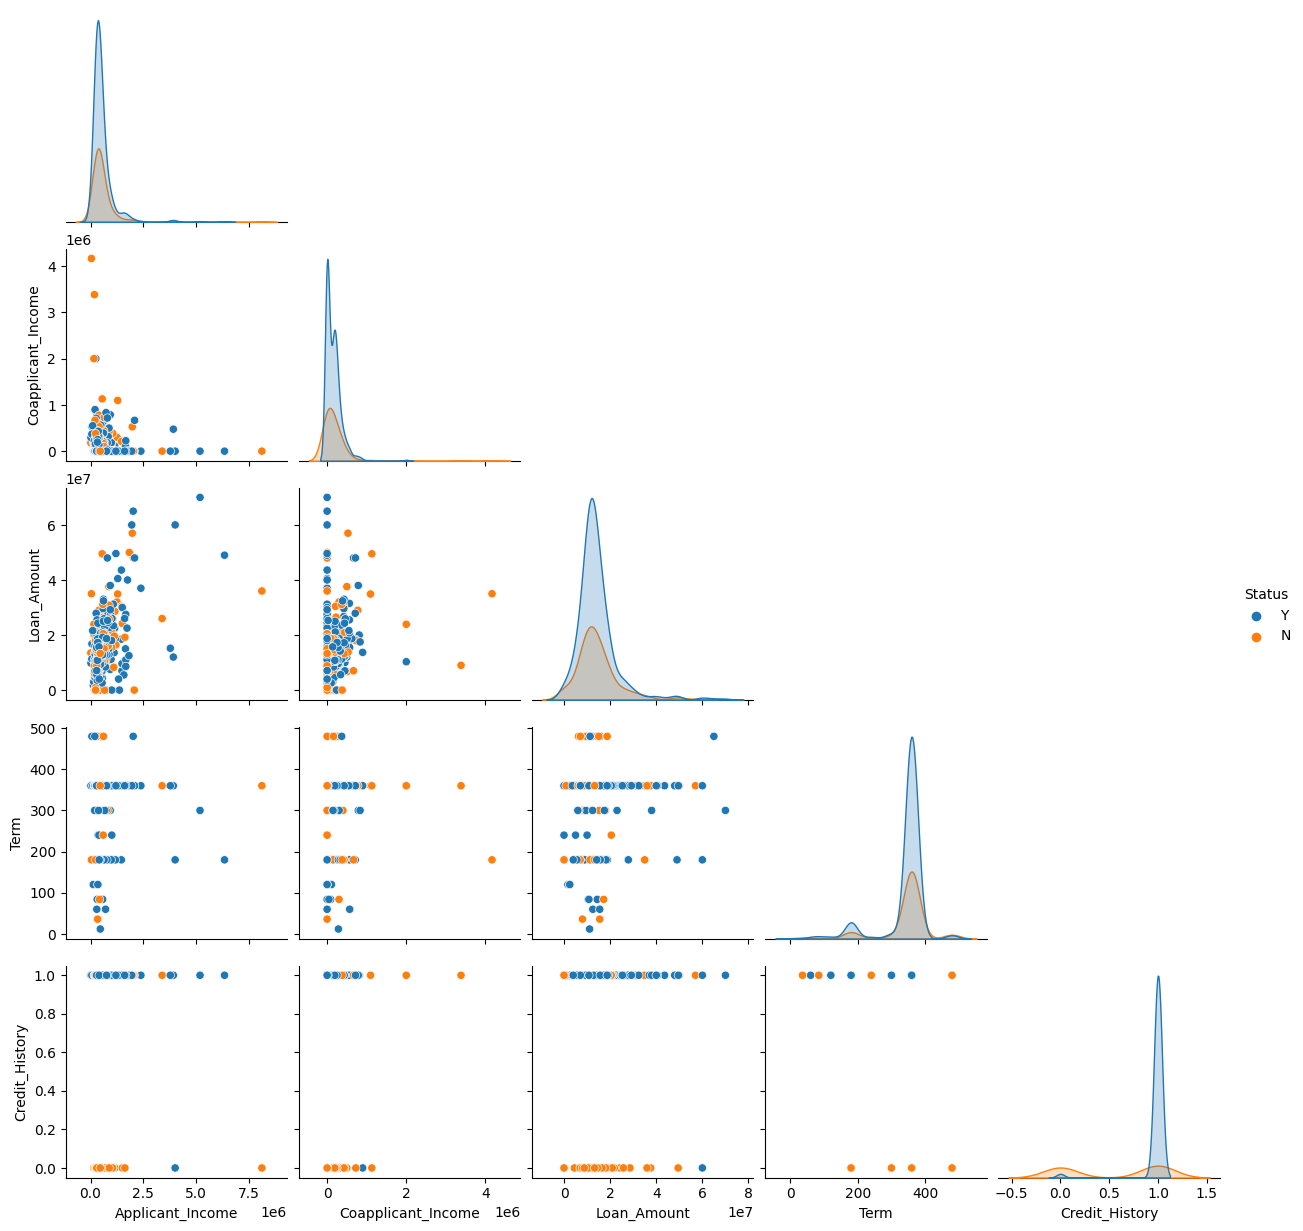

In [ ]:
sns.pairplot(df,corner=True, hue = 'Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

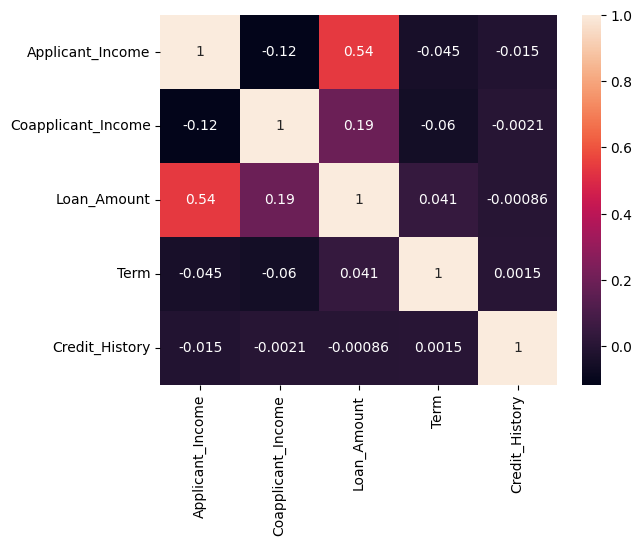

In [ ]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [ ]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [ ]:
df.shape

(614, 12)

In [ ]:
## 문제 1 ##
for i in df.columns:
  if df[i].dtype == 'object' or i == 'Credit_History':
    idx = df[df[i].isnull()].index
    df.drop(labels = idx, axis = 0, inplace = True)
##########

In [ ]:
df.shape

(511, 12)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  12
Credit_History         0
Area                   0
Status                 0
dtype: int64

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음
categorical.append('Credit_History')

In [ ]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Area',
 'Status',
 'Credit_History']

In [ ]:
## 문제 2 ##
# 코드 작성
le = LabelEncoder()
for i in categorical:
  df[i] = le.fit_transform(df[i])
##########

In [ ]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              511 non-null    int64  
 1   Married             511 non-null    int64  
 2   Dependents          511 non-null    int64  
 3   Education           511 non-null    int64  
 4   Self_Employed       511 non-null    int64  
 5   Applicant_Income    511 non-null    int64  
 6   Coapplicant_Income  511 non-null    float64
 7   Loan_Amount         511 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      511 non-null    int64  
 10  Area                511 non-null    int64  
 11  Status              511 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 51.9 KB


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [ ]:
import tqdm

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1,2,1


In [ ]:
df.iloc[0]

Gender                       1.0
Married                      0.0
Dependents                   0.0
Education                    0.0
Self_Employed                0.0
Applicant_Income        584900.0
Coapplicant_Income           0.0
Loan_Amount           15000000.0
Term                       360.0
Credit_History               1.0
Area                         2.0
Status                       1.0
Name: 0, dtype: float64

In [ ]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  12
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        avg = 0
        j = 0

        tmp_df = df[feat_name].dropna()
        tmp_df = pd.DataFrame(tmp_df)

        for j in range (0, self.k+1):
          if sorted_dist[j][0] == i:
            continue
          index = sorted_dist[j][0]
          print(sorted_dist[j][0])
          avg = avg + tmp_df.iloc[index]
        
        avg = avg/self.k

        df[feat_name].iloc[i] = avg
        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1) # 결측치칼럼 제외 나머지 칼럼들이 포함된 데이터프레임 X
    y = y.drop([feat_name]) # 결측치가 존재하는 그 column
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train): # 모든 데이터 수!

    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작한   #####################
      drop_df = X.drop(categorical, axis = 1)
      drop_df = drop_df.values
      drop_y = y.drop(categorical)
      
      dist = 0

      for j in range(len(drop_y)):
        dist = dist + ((drop_df[i][j] - drop_y[j]) ** 2)
    
      dist = dist ** 0.5

      dist_dict[i] = dist
    
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [ ]:
# 아래 숫자는 변경하셔도 상관 없습니다.
norm_df = (df-df.mean())/df.std()
imputer = Knn_imputer(3)
imputer.fit(norm_df)

# test set에 대해 predict를 진행합니다.
imputer.predict(norm_df, 'Term')

  0%|          | 0/511 [00:00<?, ?it/s]<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
  6%|▌         | 30/511 [00:01<00:26, 18.31it/s]

152
135
149


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
  7%|▋         | 37/511 [00:03<00:43, 10.88it/s]

65
394
320


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
  8%|▊         | 39/511 [00:04<01:04,  7.33it/s]

432
64
145


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 13%|█▎        | 66/511 [00:05<00:34, 12.93it/s]

36
394
320


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 19%|█▉        | 97/511 [00:07<00:32, 12.64it/s]

128
462
500


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 28%|██▊       | 141/511 [00:08<00:17, 20.89it/s]

62
487
422


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 33%|███▎      | 168/511 [00:09<00:14, 23.77it/s]

339
3
452


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 37%|███▋      | 191/511 [00:10<00:12, 25.13it/s]

496
371
478


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 39%|███▊      | 197/511 [00:10<00:13, 22.49it/s]

473
481
265


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 60%|██████    | 307/511 [00:11<00:03, 59.51it/s]

14
224
324


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
 69%|██████▉   | 354/511 [00:11<00:02, 65.65it/s]

104
264
409


<ipython-input-30-6b8ef20c1c28>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i] = avg
100%|██████████| 511/511 [00:12<00:00, 40.94it/s]

205
435
279


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
:

<Axes: >

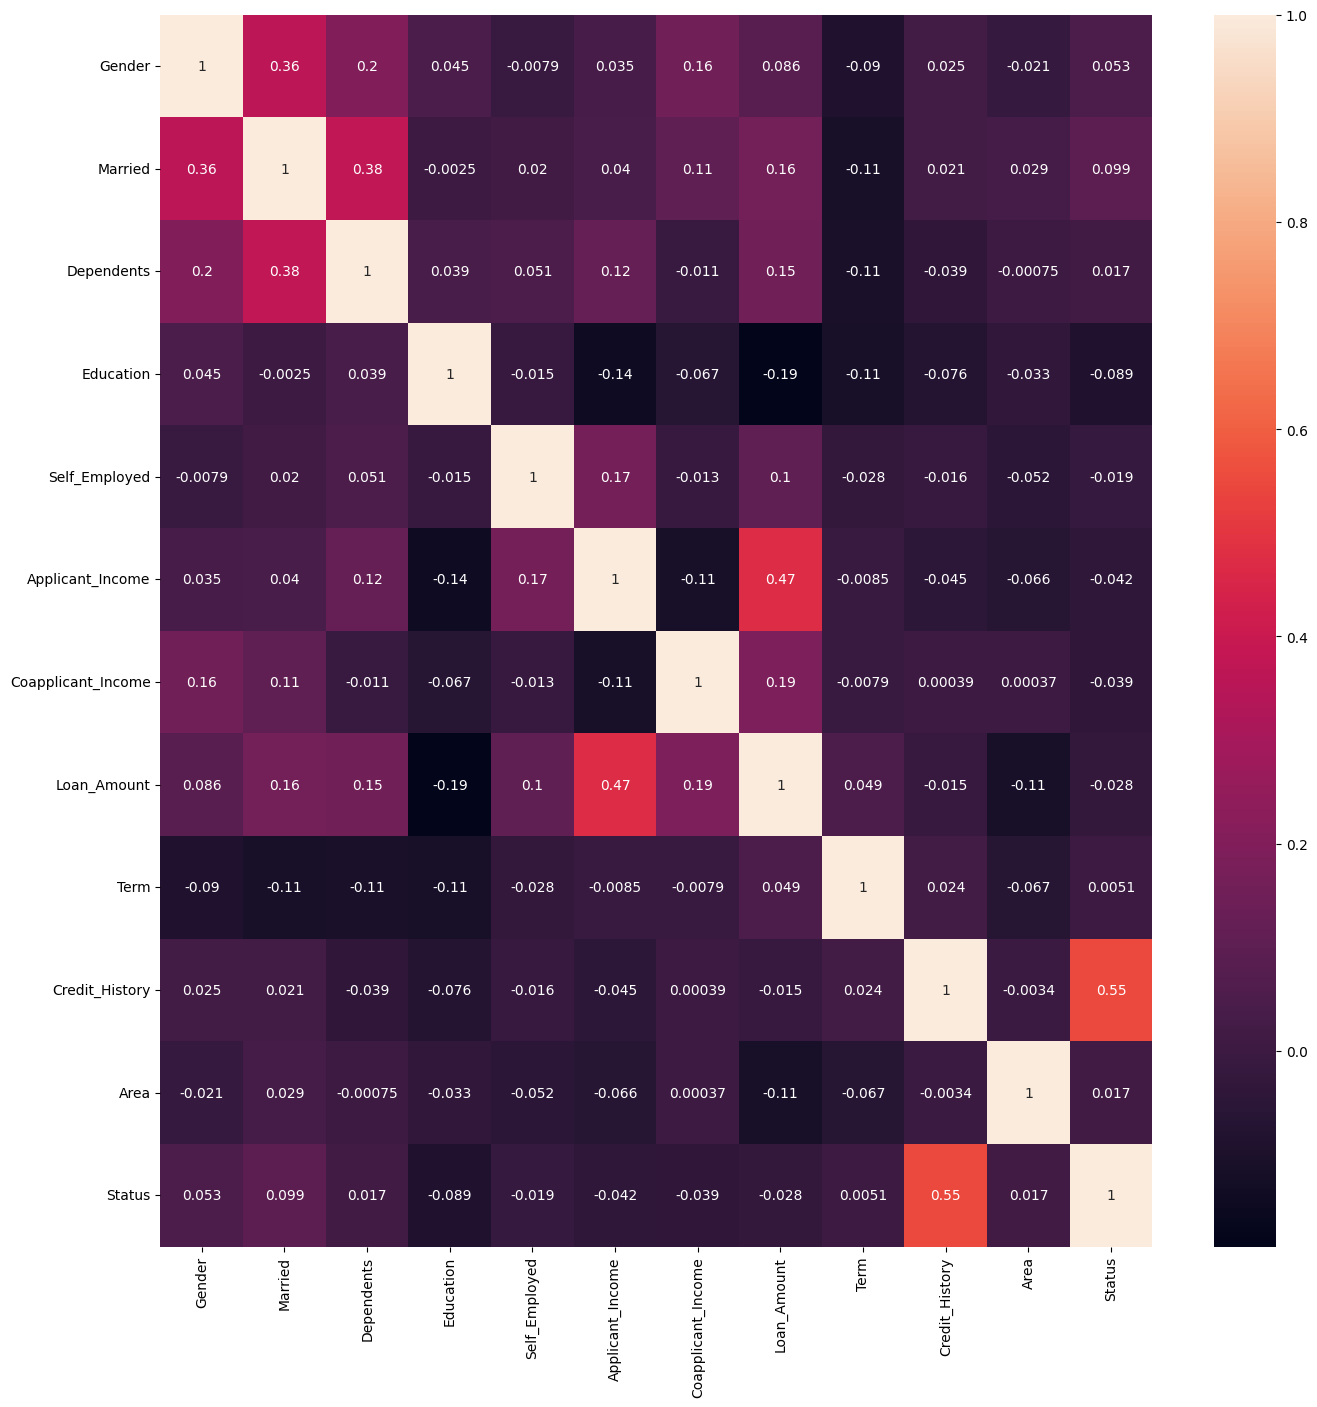

In [ ]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
corr = df.corr()
sns.heatmap(corr, annot=True) # numerical feature들끼리의 correlation
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

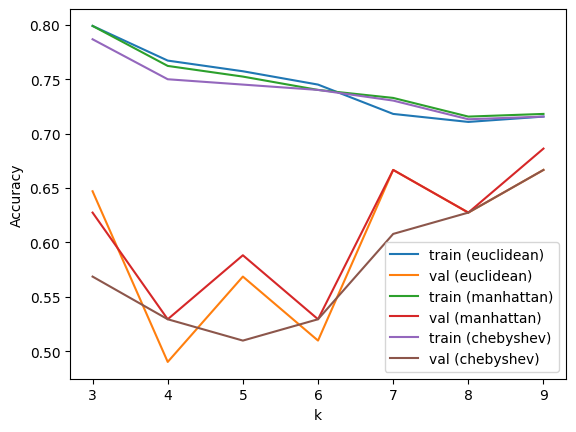

best param : k -> 9 , c -> manhattan
test accuracy:  0.5769230769230769


In [ ]:
### 문제 1 ###
### 코드 작성 ###

k_list = range(3, 10)
c_list = ['euclidean', 'manhattan', 'chebyshev']

t_accuracies = []
v_accuracies = []

accuracy = -1

for c in c_list:
  t = []
  v = []
  for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = c)
    classifier.fit(X_train, y_train)
    t_score = classifier.score(X_train, y_train)
    v_score = classifier.score(X_val, y_val)
    t.append(t_score)
    v.append(v_score)
    if accuracy < v_score: # validation accuracy가 가장 좋았을 때의 k, c값 저장
      accuracy = v_score
      best_k = k
      best_c = c
  
  t_accuracies.append(t)
  v_accuracies.append(v)


fig, ax = plt.subplots()

for i in range(len(c_list)):
  ax.plot(k_list, t_accuracies[i], label = f'train ({c_list[i]})')
  ax.plot(k_list, v_accuracies[i], label=f'val ({c_list[i]})')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

best_classifier = KNeighborsClassifier(n_neighbors = best_k, metric = best_c)
X_all = pd.concat([X_train, X_val])
y_all = pd.concat([y_train, y_val])

classifier.fit(X_all, y_all)
test_accuracy = classifier.score(X_test, y_test)

print("best param : k ->", best_k, ", c ->", best_c)
print("test accuracy: ", test_accuracy)
################

**설명 작성**  
- 최적의 파라미터: k : 9, c : manhattan
- 설명: train 데이터를 이용해서 3~10의 k값, 세가지 거리측정법을 바꾸어가며 학습시킨다.</br>학습을 한 후 validation set을 넣어 가장 정확도가 좋았던 k값과 거리측정값(c)을 계산했다.</br>그 결과 k 9, c manhattan가 validation set에 대해 가장 정확도가 좋았다.
</br>참고로 매번 새로 실행할 때마다 이 값이 조금씩 변화하는 것을 알게 되었고, 이는 train test split에서 생기는 오류로 짐작한다.</br>위에서 구한 best parameter를 가지고 전체 데이터셋에서 test만 제외한 train+validation set을 넣어 학습시킨다.</br>test set을 넣어 test_accuracy를 계산하면 0.57 가량이 나온다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [ ]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

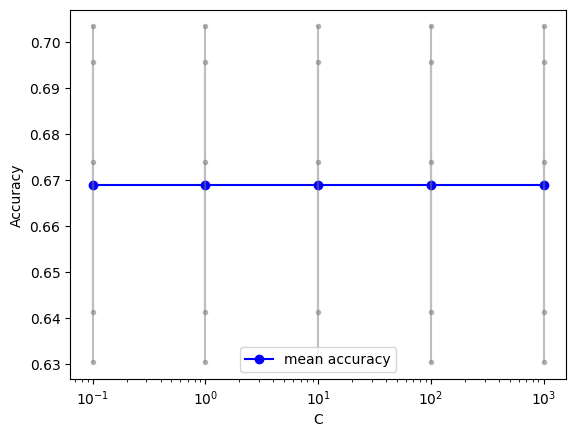

best C : 0.1 test accuracy :  0.3269230769230769


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
## 문제 6-1 ##
# 코드 작성
X_concat = pd.concat([X_train, X_val], axis=0)
y_concat = pd.concat([y_train, y_val], axis=0)

c_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
accuracy = []
acc_mean = []

best_acc = -1

for i in c_list:
  model = LinearSVC(C = i, random_state = 42)
  cv = cross_val_score(model, X_concat, y_concat, cv = 5)
  accuracy.append(cv)
  acc_mean.append(cv.mean())
  if best_acc < cv.mean():
    best_acc = cv.mean()
    best_param = i

fig, ax = plt.subplots()

ax.plot(c_list, acc_mean, marker = 'o', color = 'blue', label = 'mean accuracy')

for i, acc in enumerate(accuracy):
    ax.plot([c_list[i]]*len(acc), acc, marker='.', color='grey', alpha=0.5)

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model = LinearSVC(C = best_param, random_state = 42)
model.fit(X_concat, y_concat)
test_acc = model.score(X_test, y_test)

print("best C :", best_param, "test accuracy : ", test_acc)

############

**설명 작성**  
- 최적의 파라미터: c값 0.1
- 설명: c 후보군 [0.1, 1.0, 10.0, 100.0, 1000.0]에 대해서, c값을 바꾸어가며 하나의 후보를 검사할 때마다 train+validation set을 가지고 5-fold cross validation을 진행한다.</br>C 각각의 값에 대한 평균 정확도와 매 폴드마다의 각각 정확도를 구해서 그래프로 출력한다.</br>평균 정확도를 기준으로 가장 값이 높은 것에 대한 c값인 0.1을 best parameter로 저장한다.</br>c = 0.1 로 train+validation set을 넣어 새로 linear SVM 모델을 학습시킨다.</br>test set을 넣어 정확도를 계산하면 0.3269가 나온다.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

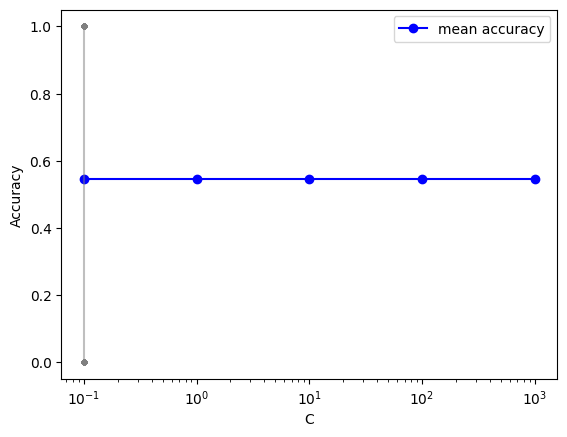

best C : 0.1 test accuracy :  0.3269230769230769


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
## 문제 6-2 ##
# 코드 작성
X_concat = pd.concat([X_train, X_val], axis=0)
y_concat = pd.concat([y_train, y_val], axis=0)

c_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
accuracy = []
acc_mean = []

best_acc = -1

loocv = LeaveOneOut()

for i in c_list:
  accuracy = []
  model = LinearSVC(C = i, random_state = 42)
  cv = cross_val_score(model, X_concat, y_concat, cv = loocv)
  accuracy.append(cv)
  acc_mean.append(cv.mean())
  if best_acc < cv.mean():
    best_acc = cv.mean()
    best_param = i

fig, ax = plt.subplots()

ax.plot(c_list, acc_mean, marker = 'o', color = 'blue', label = 'mean accuracy')

for i, acc in enumerate(accuracy):
    ax.plot([c_list[i]]*len(acc), acc, marker='.', color='grey', alpha=0.5)

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model = LinearSVC(C = best_param, random_state = 42)
model.fit(X_concat, y_concat)
test_acc = model.score(X_test, y_test)

print("best C :", best_param, "test accuracy : ", test_acc)

############

**설명 작성**  
- 최적의 파라미터: 0.1
- 설명: c 후보군 [0.1, 1.0, 10.0, 100.0, 1000.0]에 대해서, c값을 바꾸어가며 하나의 후보를 검사할 때마다 train+validation set을 가지고 LOOCV를 진행한다.</br>C 각각의 값에 대한 평균 정확도와 모든 데이터에 대한 Leave-one-out을 진행해 각각 정확도를 구해서 그래프로 출력한다.</br>
평균 정확도를 기준으로 가장 값이 높은 것에 대한 c값인 0.1을 저장해둔다</br>0.1을 c의 파라미터로 넣어 linear SVM 모델을 train+validation set에 대해 다시 학습시킨다.</br>test set을 넣어 정확도를 계산하면 약 0.3269가 나온다.</br>

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [ ]:
## 문제 7-1 ##
# 코드 작성
X_concat = pd.concat([X_train, X_val], axis=0)
y_concat = pd.concat([y_train, y_val], axis=0)

k_list = ['poly', 'rbf', 'sigmoid']
accuracy = []
acc_mean = []

best_acc = -1

for i in k_list:
  clf = SVC(kernel = i, C = 2)
  cv = cross_val_score(clf, X_concat, y_concat, cv = 5)
  accuracy.append(cv)
  acc_mean.append(cv.mean())
  if best_acc < cv.mean():
    best_acc = cv.mean()
    best_param = i

model = SVC(kernel = best_param, C = 2)
model.fit(X_concat, y_concat)
test_acc = model.score(X_test, y_test)

print("best kernel :", best_param, "test accuracy : ", test_acc)

############

best kernel : poly test accuracy :  0.6923076923076923


In [ ]:
## 문제 7-2 ##
# 코드 작성
X_concat = pd.concat([X_train, X_val], axis=0)
y_concat = pd.concat([y_train, y_val], axis=0)

k_list = ['poly', 'rbf', 'sigmoid']
accuracy = []
acc_mean = []

best_acc = -1

loocv = LeaveOneOut()

for i in k_list:
  clf = SVC(kernel = i, C = 2)
  cv = cross_val_score(clf, X_concat, y_concat, cv = loocv)
  accuracy.append(cv)
  acc_mean.append(cv.mean())
  if best_acc < cv.mean():
    best_acc = cv.mean()
    best_param = i

model = SVC(kernel = best_param, C = 2)
model.fit(X_concat, y_concat)
test_acc = model.score(X_test, y_test)

print("best kernel :", best_param, "test accuracy : ", test_acc)
############

best kernel : poly test accuracy :  0.6923076923076923


**7-3 설명 작성**  
- 설명: 6-2에서, linear svm으로 LOOCV한 정확도는 0.33이었고 7-2에서 nonlinear svm에서 가장 정확도가 높은 poly커널을 기준으로 LOOCV를 한 정확도 값은 0.69였다.</br>주어진 데이터는 비선형 구조라고 생각할 수 있다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
## 문제 8-1 ##
## 코드 작성 ##
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf_gscv = GridSearchCV(rf_clf, param_grid, cv = 5)
rf_clf_gscv.fit(X_train, y_train)

gscv_bp = rf_clf_gscv.best_params_
print(gscv_bp)
############

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
## 문제 8-2 ##
## 코드 작성 ##
rf_best = RandomForestClassifier(**gscv_bp, random_state = 42)
# rf_best = rf_clf_gscv.best_estimator_

rf_best.fit(X_train, y_train)
test_acc = rf_best.score(X_test, y_test)

print(test_acc)
############

0.8269230769230769
